In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
os.listdir('../data')

['core_1100_dtw_agemodel.csv',
 'core_1100-old-agemodel.csv',
 'LR04stack.csv',
 'core_1100.csv',
 'core_1100_d13C_pl.csv',
 'core_1150_d13C_pl.csv',
 'core_1100_d18O_pl.csv',
 'core_1150_d13C_bulk.csv',
 'core_1100_aragonite.csv',
 'Paul_etal_M74-4-1100.xlsx',
 'Paul_etal_M74-4-1150.xlsx',
 '.ipynb_checkpoints',
 'core_1150_d18O_bulk.csv',
 'core_1150.csv',
 'core_1150_aragonite.csv',
 'core_1150_d18O_pl.csv']

In [3]:
[x for x in os.listdir('../out') if x.endswith('.csv')]

['d18O_pl_LR04stack_core_1100_out.csv',
 'd18O_pl_core_1100_dtw_agemodel_core_1150_out.csv',
 'tdm_LR04stack_core_1100.csv',
 'd18O_pl_LR04stack_core_1150_out.csv']

In [2]:
df1 = pd.read_csv("../data/LR04stack.csv")

In [3]:
df1.columns

Index(['time', 'd18O'], dtype='object')

In [4]:
df1 = df1[df1['time'] <= 280]

In [2]:
df2 = pd.read_csv("../out/d18O_pl_core_1100_dtw_agemodel_core_1150_out.csv")

In [3]:
df2.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

In [6]:
df2.head(50)

,depth_m,d18O_pl,dtw_time [kyrs B.P.]
0,0.01,-1.891,0
1,0.06,-1.525,1
2,0.11,-2.421,2
3,0.16,-2.422,2
4,0.21,-1.562,2
5,0.26,-1.293,2
6,0.31,-1.892,2
7,0.36,-1.697,2
8,0.41,-2.114,2
9,0.46,-1.534,2


In [62]:
# Add 14C and biostratigraphic ages and interpolate
df2.at[8, 'dtw_time [kyrs B.P.]'] = 5.120
df2.at[20, 'dtw_time [kyrs B.P.]'] = 9.600
df2.at[36, 'dtw_time [kyrs B.P.]'] = 20.000
df2.at[40, 'dtw_time [kyrs B.P.]'] = 75.000

In [35]:
fill1 = np.linspace(0, 5.12, 8, endpoint=False)
for x in range(1,8):
    df2.at[x, 'dtw_time [kyrs B.P.]'] = fill1[x]

In [36]:
fill2 = np.linspace(5.12, 9.6, 12, endpoint=False)
for x in range(1, 12):
    df2.at[x + 8, 'dtw_time [kyrs B.P.]'] = fill2[x]

In [38]:
fill3 = np.linspace(9.6, 20, 16, endpoint=False)
for x in range(1, 16):
    df2.at[x + 20, 'dtw_time [kyrs B.P.]'] = fill3[x]

In [41]:
fill4 = np.linspace(20, 75, 3, endpoint=False)
for x in range(1, 3):
    df2.at[x + 36, 'dtw_time [kyrs B.P.]'] = fill4[x]

In [50]:
fill5 = np.linspace(75, 109, 249, endpoint=False)
for x in range(1, 249):
    df2.at[x + 40, 'dtw_time [kyrs B.P.]'] = fill5[x]

In [56]:
df3 = pd.read_csv("../out/d18O_pl_LR04stack_core_1100_out.csv")

In [57]:
df3.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

In [14]:
df4 = pd.read_csv("../out/d18O_pl_LR04stack_core_1150_out.csv")

In [15]:
df4.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]', 'sed_rates [m/kyr]'], dtype='object')

In [16]:
# Add 14C ages and interpolate
df4.at[8, 'dtw_time [kyrs B.P.]'] = 5.120
df4.at[20, 'dtw_time [kyrs B.P.]'] = 9.600

In [17]:
fill1 = np.linspace(0, 5.12, 8, endpoint=False)
for x in range(1,8):
    df4.at[x, 'dtw_time [kyrs B.P.]'] = fill1[x]

In [18]:
fill2 = np.linspace(5.12, 9.6, 12, endpoint=False)
for x in range(1, 12):
    df4.at[x + 8, 'dtw_time [kyrs B.P.]'] = fill2[x]

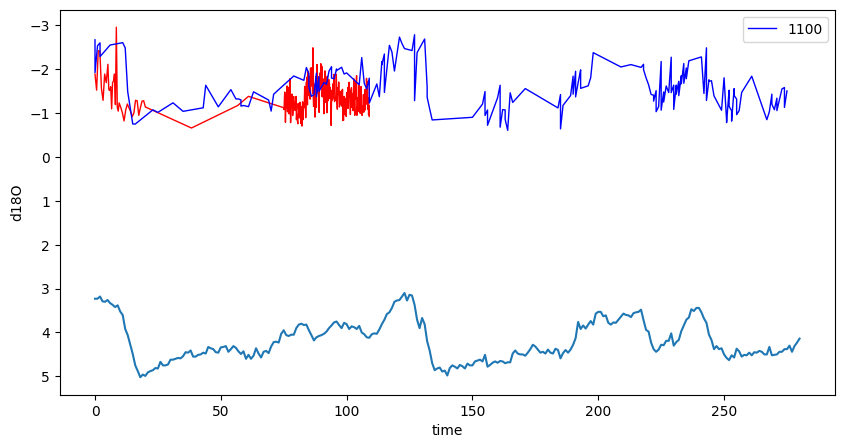

In [58]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(10,5)
sns.lineplot(ax=ax, x='time', y='d18O', data=df1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df2, estimator=None, color='red', linewidth=1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df3, estimator=None, color='blue', linewidth=1, label='1100')
# sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='d18O_pl', data=df4, estimator=None, color='green', linewidth=1, label='1150')
ax.invert_yaxis()

In [20]:
f.savefig('../out/fig05.svg')

In [21]:
tmp1 = pd.read_csv("../data/core_1150_aragonite.csv", skip_blank_lines=True)

In [22]:
tmp2 = pd.read_csv("../data/core_1150_d18O_pl.csv", skip_blank_lines=True)

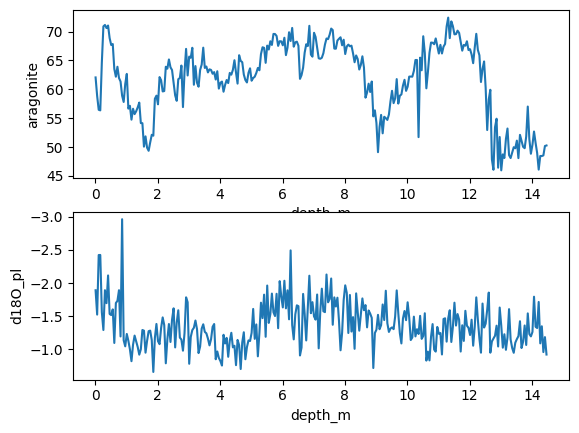

In [23]:
fig, ax = plt.subplots(2, 1)
sns.lineplot(ax=ax[0], x=tmp1['depth_m'], y=tmp1['aragonite'])
sns.lineplot(ax=ax[1], x=tmp2['depth_m'], y=tmp2['d18O_pl'])
ax[1].invert_yaxis()

In [24]:
fig.savefig('../out/tmp.png', dpi=300)

## Time-Depth model

In [39]:
old_model_1100 = pd.read_csv('../data/core_1100-old-agemodel.csv', sep=';', decimal=',')

In [40]:
old_model_1100.head()

,depth_m,time
0,0.01,0.000000
1,0.06,0.899604
2,0.11,1.799208
3,0.16,3.598416
4,0.21,5.397624


In [41]:
df3.columns

Index(['depth_m', 'd18O_pl', 'dtw_time [kyrs B.P.]'], dtype='object')

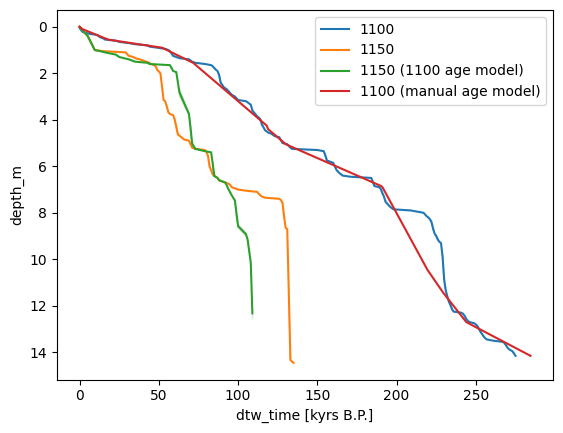

In [42]:
fig, ax = plt.subplots(1,1)
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='depth_m', data=df3, label='1100')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='depth_m', data=df4, label='1150')
sns.lineplot(ax=ax, x='dtw_time [kyrs B.P.]', y='depth_m', data=df2, label='1150 (1100 age model)')
sns.lineplot(ax=ax, x='time', y='depth_m', data=old_model_1100, label='1100 (manual age model)')
ax.invert_yaxis()

In [43]:
fig.savefig('../out/time-depth-model.svg')

In [44]:
time_depth_model = df4[['depth_m','dtw_time [kyrs B.P.]']]
time_depth_model.to_csv(f"../out/tdm_LR04stack_core_1150.csv", index=False)

In [45]:
time_depth_model = df2[['depth_m','dtw_time [kyrs B.P.]']]
time_depth_model.to_csv(f"../out/tdm_core_1100_as_ref_core_1150.csv", index=False)